# Test
A través del siguiente notebook se va a realizar el proceso de split, generación de muestras sintéticas, one_hot_encoding y generación del modelo de regresión logística

In [68]:
import pandas as pd
import numpy as np
import os

In [22]:
path = r"C:\Users\andre\OneDrive\Escritorio\Proyecto de Grado\result\db_agrupado"
mes = 'Enero'
path_csv = os.path.join(path, mes + '_Agrupado.csv')
data = pd.read_csv(path_csv, encoding='Latin1', sep=';')

In [23]:
data.head()

,DIRECTORIO,ZONA_TERRITORIAL,FACTOR_EXPANSION,DPTO,SEXO,EDAD,PARENTESCO_JEFE_DE_HOGAR,MADRE_RESIDE_HOGAR,PADRE_RESIDE_HOGAR,SE_CONSIDERA_CAMPESINO,...,TIPO_OCUPACION_VIVIENDA,HOGAR_TIENE_CUENTA_CORRIENTE,HOGAR_TIENE_CUENTA_AHORROS,HOGAR_TIENE_CDT,HOGAR_TIENE_PRESTAMO_COMPRA_VIVIENDA,HOGAR_TIENE_PRESTAMO_COMPRA_VEHICULO,HOGAR_TIENE_PRESTAMO_LIBRE_INVERSION,HOGAR_TIENE_TARJETA_CREDITO,NUMERO_PERSONAS_HOGAR,DISCAPACIDAD
0,7309060,Cabecera,1580.677273,CUNDINAMARCA,Masculino,27,"Pareja, esposo(a), conyuge, companero(a)",No,No,Si,...,En arriendo o subarriendo,No,Si,No,No,No,No,No,3,Sin discapacidad
1,7309064,Resto,324.598262,RISALRALDA,Masculino,18,"Hijo(a), hijastro(a)",Si,No,Si,...,En arriendo o subarriendo,No,Si,No,No,No,No,No,5,Sin discapacidad
2,7309067,Resto,167.457366,RISALRALDA,Femenino,25,"Hijo(a), hijastro(a)",No,Si,Si,...,"Propia, totalmente pagada",No,Si,No,No,No,No,No,2,Sin discapacidad
3,7309073,Resto,202.189536,RISALRALDA,Femenino,27,"Hijo(a), hijastro(a)",Si,No,Si,...,En usufructo,No,Si,No,No,No,No,No,6,Sin discapacidad
4,7309073,Resto,202.189536,RISALRALDA,Femenino,23,"Hijo(a), hijastro(a)",Si,No,Si,...,En usufructo,No,Si,No,No,No,No,No,6,Sin discapacidad


In [24]:
df = data.drop(columns=['DIRECTORIO','FACTOR_EXPANSION'])

In [25]:
df.head()

,ZONA_TERRITORIAL,DPTO,SEXO,EDAD,PARENTESCO_JEFE_DE_HOGAR,MADRE_RESIDE_HOGAR,PADRE_RESIDE_HOGAR,SE_CONSIDERA_CAMPESINO,COMUNIDAD_ES_CAMPESINA,ETNIA,...,TIPO_OCUPACION_VIVIENDA,HOGAR_TIENE_CUENTA_CORRIENTE,HOGAR_TIENE_CUENTA_AHORROS,HOGAR_TIENE_CDT,HOGAR_TIENE_PRESTAMO_COMPRA_VIVIENDA,HOGAR_TIENE_PRESTAMO_COMPRA_VEHICULO,HOGAR_TIENE_PRESTAMO_LIBRE_INVERSION,HOGAR_TIENE_TARJETA_CREDITO,NUMERO_PERSONAS_HOGAR,DISCAPACIDAD
0,Cabecera,CUNDINAMARCA,Masculino,27,"Pareja, esposo(a), conyuge, companero(a)",No,No,Si,Si,Ninguno de los anteriores,...,En arriendo o subarriendo,No,Si,No,No,No,No,No,3,Sin discapacidad
1,Resto,RISALRALDA,Masculino,18,"Hijo(a), hijastro(a)",Si,No,Si,Si,Ninguno de los anteriores,...,En arriendo o subarriendo,No,Si,No,No,No,No,No,5,Sin discapacidad
2,Resto,RISALRALDA,Femenino,25,"Hijo(a), hijastro(a)",No,Si,Si,Si,Ninguno de los anteriores,...,"Propia, totalmente pagada",No,Si,No,No,No,No,No,2,Sin discapacidad
3,Resto,RISALRALDA,Femenino,27,"Hijo(a), hijastro(a)",Si,No,Si,Si,Ninguno de los anteriores,...,En usufructo,No,Si,No,No,No,No,No,6,Sin discapacidad
4,Resto,RISALRALDA,Femenino,23,"Hijo(a), hijastro(a)",Si,No,Si,Si,Ninguno de los anteriores,...,En usufructo,No,Si,No,No,No,No,No,6,Sin discapacidad


In [26]:
X = df.drop(columns='ACTIVIDAD_OCUPADA_ULTIMA_SEMANA')
y = df['ACTIVIDAD_OCUPADA_ULTIMA_SEMANA']

In [27]:
display(X.shape)
display(y.shape)

(6902, 41)

(6902,)

## Split en conjuntos de Entrenamiento y Prueba

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
categoric_vars = X.select_dtypes(include=['object']).columns.to_list()
numeric_vars = X.select_dtypes(include=['int64','float64']).columns.to_list()

In [30]:
# Prueba con la estratificación 
#X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state=123, shuffle=True, stratify=categoric_vars)

In [31]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state=123, shuffle=True)

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Sobremuestreo de la clase minoritaria

In [33]:
cat_smote = [True if x in categoric_vars else False for x in X_train.columns]

In [34]:
sm = SMOTENC(categorical_features=cat_smote, random_state=123)

In [35]:
X_resample, y_resample = sm.fit_resample(X_train, y_train)

## Procesamiento del conjunto de entrenamiento

In [36]:
preproccessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_vars),
        ('cat', OneHotEncoder(drop='first'), categoric_vars)
    ])

In [37]:
pipeline  = Pipeline([('Procesamiento', preproccessing)])

In [38]:
pipeline

Pipeline(steps=[('Procesamiento',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['EDAD',
                                                   'NUMERO_HOGARES_VIVIENDA',
                                                   'NUMERO_CUARTOS_VIVIENDA',
                                                   'NUMERO_CUARTOS_DORMIR',
                                                   'NUMERO_PERSONAS_HOGAR']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ZONA_TERRITORIAL', 'DPTO',
                                                   'SEXO',
                                                   'PARENTESCO_JEFE_DE_HOGAR',
                                                   'MADRE_RESIDE_HOGAR',
                                                   'PADRE_RESIDE_HOGAR',
                                                   'SE_CONSIDERA...
                                                   'GENERO', 'TIPO_VIVIENDA',
                                                   'SERVICIOS_ENERGIA_ELECTRICA',
                                                   'ESTRATO_ENERGIA_ELECTRICA',
                                                   'SERVICIOS_GAS_NATURAL',
                                                   'SERVICIOS_ALCANTARILLADO',
                                                   'SERVICIOS_RECOLECCION_BASURAS',
                                                   'SERVICIOS_ACUEDUCTO',
                                                   'TIPO_SANITARIO',
                                                   'COMO_ELIMINA_BASURA',
                                                   'DONDE_OBTIENE_AGUA',
                                                   'DONDE_PREPARA_ALIMENTOS',
                                                   'TIPO_OCUPACION_VIVIENDA',
                                                   'HOGAR_TIENE_CUENTA_CORRIENTE',
                                                   'HOGAR_TIENE_CUENTA_AHORROS', ...])]))])

In [39]:
X_train_processed = pipeline.fit_transform(X_resample, y_resample)

In [40]:
X_train_dataframe = pd.DataFrame(X_train_processed.toarray(), columns=pipeline.get_feature_names_out(), index=X_resample.index)

## Ajuste del modelo de regresión logística

In [41]:
import statsmodels as sm
from statsmodels.discrete.discrete_model import Logit


In [42]:
X_train_glm = sm.tools.add_constant(X_train_dataframe)

In [43]:
mod1 = Logit(y_resample, X_train_glm)

In [44]:
logit_reg = mod1.fit()

Optimization terminated successfully.
         Current function value: 0.266368
         Iterations 11


In [45]:
logit_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Logit Regression Results                                 
===========================================================================================
Dep. Variable:     ACTIVIDAD_OCUPADA_ULTIMA_SEMANA   No. Observations:                 7894
Model:                                       Logit   Df Residuals:                     7761
Method:                                        MLE   Df Model:                          132
Date:                             Thu, 07 Mar 2024   Pseudo R-squ.:                  0.6157
Time:                                     11:40:51   Log-Likelihood:                -2102.7
converged:                                    True   LL-Null:                       -5471.7
Covariance Type:                         nonrobust   LLR p-value:                     0.000
===============================================================================================================================================================
                                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                          -5.9125      1.879     -3.146      0.002      -9.595      -2.230
num__EDAD                                                                                       0.1999      0.046      4.385      0.000       0.111       0.289
num__NUMERO_HOGARES_VIVIENDA                                                                   -0.0313      0.033     -0.944      0.345      -0.096       0.034
num__NUMERO_CUARTOS_VIVIENDA                                                                   -0.1428      0.066     -2.169      0.030      -0.272      -0.014
num__NUMERO_CUARTOS_DORMIR                                                                      0.0785      0.074      1.066      0.286      -0.066       0.223
num__NUMERO_PERSONAS_HOGAR                                                                     -0.0359      0.054     -0.668      0.504      -0.141       0.069
cat__ZONA_TERRITORIAL_Resto                                                                     0.0702      0.188      0.373      0.710      -0.299       0.439
cat__DPTO_ANTIOQUIA                                                                             0.3075      0.993      0.310      0.757      -1.640       2.255
cat__DPTO_ARAUCA                                                                               -1.6401      1.034     -1.586      0.113      -3.667       0.387
cat__DPTO_ATLANTICO                                                                            -0.0105      0.997     -0.011      0.992      -1.965       1.944
cat__DPTO_BOGOTA                                                                               -0.5477      0.996     -0.550      0.583      -2.500       1.405
cat__DPTO_BOLIVAR                                                                              -0.2803      0.996     -0.281      0.778      -2.233       1.672
cat__DPTO_BOYACA                                                                               -0.2091      1.009     -0.207      0.836      -2.186       1.767
cat__DPTO_CALDAS                                                                               -0.2390      0.999     -0.239      0.811      -2.196       1.718
cat__DPTO_CAQUETA                                                                              -0.3076      1.008     -0.305      0.760      -2.283       1.667
cat__DPTO_CASANARE                                                                             -1.2093      1.061     -1.140      0.254      -3.288       0.870
cat__DPTO_CAUCA                                                                     

## Métricas de Calidad sobnre el modelo de regresión logística

In [52]:
# Procesamiento del conjunto de prueba

X_test_processed = pipeline.transform(X_test).toarray()
X_test_dataframe = pd.DataFrame(X_test_processed, columns=pipeline.get_feature_names_out(), index=y_test.index)
X_test_dataframe = sm.tools.add_constant(X_test_dataframe)

In [56]:
# Creación de la predicción según el conjunto de prueba
y_pred = logit_reg.predict(X_test_dataframe)

In [69]:
# Ajuste del vector estimado para a la presencia o ausencia de la característica

umbral = 0.5

# Crear un nuevo arreglo
y_pred_clasificado = np.where(y_pred >= umbral, 1, 0)

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

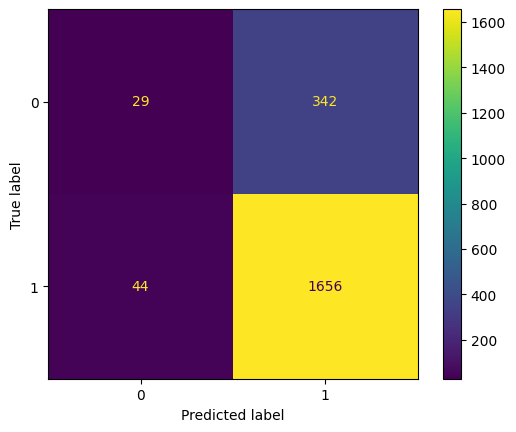

In [74]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_clasificado)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [78]:
results = pd.DataFrame(
        {
            #'modelo':model,
            'f1_score': f1_score(y_test,y_pred_clasificado),
            'precision_score':precision_score(y_test, y_pred_clasificado),
            'recall_score': recall_score(y_test, y_pred_clasificado),
            'accuracy_score':accuracy_score(y_test,y_pred_clasificado)
            }, index = [0]
        )

display(results)

,f1_score,precision_score,recall_score,accuracy_score
0,0.895619,0.828829,0.974118,0.813617


In [79]:
from sklearn.metrics import roc_curve, auc

In [84]:
fpr, tpr, _ = roc_curve(y_test, y_pred_clasificado)
auc_score = auc(fpr, tpr)

print("AUC:", auc_score)

AUC: 0.5261423814808942


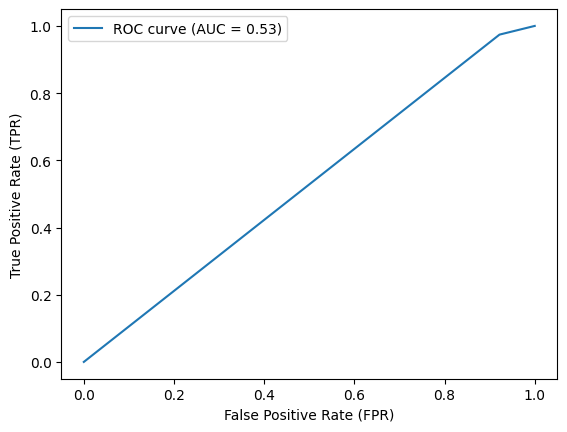

In [85]:
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.show()

# Búsqueda, ajuste y comparativa de distintos métodos de clasificación

In [87]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [88]:
estimators = {
    "svm": SVC(kernel="rbf",C=1,gamma="scale"),
    "decision_tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random_Forest": RandomForestClassifier(n_estimators = 200, random_state = 123),
    "Logistic_Regression": LogisticRegression(penalty='l1')
}

In [89]:
parametros = {
    "svm": [{
        "svm__kernel": ["rbf", "linear"],
        "svm__C": [0.1, 1, 10],
        "svm__gamma": ["scale", "auto"],
    }],
    "decision_tree": {
        "decision_tree__criterion": ["gini", "entropy"],
        "decision_tree__max_depth": [i for i in range(1,15)],
    },
    "KNN": {
        "KNN__n_neighbors": [i for i in range(1,20)],
        "KNN__weights": ["uniform", "distance"],
    },
    "Random_Forest": {
        'Random_Forest__n_estimators': [100, 200, 300],
        'Random_Forest__max_depth': [None, 10, 20],
        'Random_Forest__min_samples_split': [2, 5, 10],
    },
    "Logistic_Regression":{
        "Logistic_Regression__penalty":['l1','l2','elasticnet'],
        "Logistic_Regression__solver":['lbfgs','liblinear']
    }
}

In [90]:
from sklearn.model_selection import GridSearchCV

modelo = dict()
for estimador in estimators.keys():
    
    pipeline = Pipeline(steps = [
        ('Preprocesamiento', preproccessing), 
        (estimador, estimators[estimador])]
                        )
    
    modelo[estimador] = GridSearchCV(pipeline, parametros[estimador], cv=5, scoring='accuracy')
    
    modelo[estimador].fit(X_resample, y_resample.values.ravel())
    print("Modelo {}".format(estimador))
    print("Los mejores parámetros para el estimador son {}".format( modelo[estimador].best_params_))
    print("Accuracy: {}".format(modelo[estimador].best_score_))
    print("El Score respecto a la base de prueba es: {}".format(modelo[estimador].score(X_test,y_test)))
    print("="*20)